# Linear Algebra Assignment


Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
data=pd.read_csv("/content/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
data['horsepower'] = data['horsepower'].replace('?', pd.NA)
data['horsepower'] = data['horsepower'].astype(float)
data = data.dropna()
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = data[features]


In [23]:
similarity = cosine_similarity(X)
target_index = data[data['car name'] == 'toyota corona mark ii'].index[0]
scores = list(enumerate(similarity[target_index]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)

top_5 = scores[1:6]

for i, score in top_5:
    print(data.iloc[i]['car name'], "->", round(score, 3))




honda civic -> 1.0
toyouta corona mark ii (sw) -> 1.0
datsun 710 -> 1.0
datsun 610 -> 1.0
subaru -> 1.0


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("auto-mpg.csv")

data['horsepower'] = data['horsepower'].replace('?', np.nan).astype(float)
data = data.dropna()

X = data[['mpg','cylinders','displacement','horsepower',
          'weight','acceleration','model year']]

X = StandardScaler().fit_transform(X)

target_idx = data[data['car name'] == 'toyota corona mark ii'].index[0]
target = X[target_idx]

data['MSE'] = np.mean((X - target) ** 2, axis=1)


print(data.sort_values('MSE').iloc[1:6][['car name','MSE']])


                 car name       MSE
21            audi 100 ls  0.008260
31          toyota corona  0.035839
49     mercury capri 2000  0.045199
18           datsun pl510  0.045575
57  toyota corona hardtop  0.048676


In [25]:
import pandas as pd
import numpy as np

data = pd.read_csv("auto-mpg.csv")

data['horsepower'] = data['horsepower'].replace('?', np.nan).astype(float)
data = data.dropna()

X = data[['mpg','cylinders','displacement','horsepower',
          'weight','acceleration','model year']].values

target_idx = data[data['car name'] == 'toyota corona mark ii'].index[0]
target = X[target_idx]

data['MSE'] = np.mean((X - target) ** 2, axis=1)

print(data.sort_values('MSE').iloc[1:6][['car name','MSE']])


                      car name         MSE
110                 datsun 610   12.892857
22                    saab 99e   13.892857
150                     subaru   58.607143
80             ford pinto (sw)  100.000000
369  chevrolet cavalier 2-door  118.857143


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [28]:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("auto-mpg.csv")

data['horsepower'] = data['horsepower'].replace('?', np.nan).astype(float)
data = data.dropna()

X = data[['mpg','cylinders','displacement','horsepower',
          'weight','acceleration','model year']].values

target_idx = data[data['car name'] == 'toyota corona mark ii'].index[0]
target = X[target_idx].reshape(1, -1)
similarity = cosine_similarity(X, target).flatten()

most_orthogonal = data.iloc[similarity.argmin()]

print("Most orthogonal car:")
print(most_orthogonal['car name'])
print("Cosine similarity:", similarity.min())


Most orthogonal car:
buick estate wagon (sw)
Cosine similarity: 0.9945870555870724


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

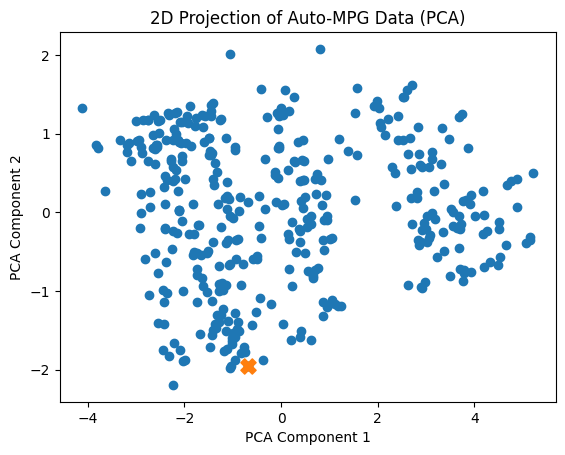

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("auto-mpg.csv")

data['horsepower'] = data['horsepower'].replace('?', np.nan).astype(float)
data = data.dropna()

X = data[['mpg','cylinders','displacement','horsepower',
          'weight','acceleration','model year']]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

target_idx = data[data['car name'] == 'toyota corona mark ii'].index[0]

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(
    X_2d[target_idx, 0],
    X_2d[target_idx, 1],
    marker='X',
    s=120
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Projection of Auto-MPG Data (PCA)")
plt.show()


### Question 4
Write a function that returns dot product of two list of numbers

In [34]:

def dot_product(a, b):
    return sum(x * y for x, y in zip(a, b))
list1 = [1,3]
list2 = [2,4]

result = dot_product(list1, list2)
print(result)


14


### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [36]:
# Your code here
def projection(a, b):
    dot_ab = sum(x * y for x, y in zip(a, b))
    dot_bb = sum(y * y for y in b)

    return [(dot_ab / dot_bb) * y for y in b]
a = [3, 4]
b = [1, 0]

print(projection(a, b))


[3.0, 0.0]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [37]:
# Your code here
import math

class Vector:
    def __init__(self, values):
        self.values = values


    def __add__(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must be of same length for addition.")
        return Vector([a + b for a, b in zip(self.values, other.values)])


    def dot(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Vectors must be of same length for dot product.")
        return sum(a * b for a, b in zip(self.values, other.values))


    def magnitude(self):
        return math.sqrt(sum(a * a for a in self.values))


    def __repr__(self):
        return f"Vector({self.values})"


In [44]:
v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])

print(v1 + v2)
print(v1.dot(v2))
print(v1.magnitude())
print(v1)

Vector([5, 7, 9])
32
3.7416573867739413
Vector([1, 2, 3])


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [38]:
# Your code here
import math

def vector_norms(v):

    l1 = sum(abs(x) for x in v)

    l2 = math.sqrt(sum(x**2 for x in v))

    return l1, l2


In [45]:
v = [3, -4, 12]

l1, l2 = vector_norms(v)
print("L1 norm:", l1)
print("L2 norm:", l2)


L1 norm: 19
L2 norm: 13.0
